### Import bibliotek

In [209]:
# Importowanie potrzebnych bibliotek
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [177]:
# Wczytanie danych
df = pd.read_csv('drinks.csv')

world = gpd.read_file('World_Countries__Generalized_.shp')

In [178]:
# Wybór krajów na wybraną literę, np. 'A'
selected_countries = df[df['country'].str.startswith('P')]
selected_countries

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
128,Pakistan,0,0,0,0.0
129,Palau,306,63,23,6.9
130,Panama,285,104,18,7.2
131,Papua New Guinea,44,39,1,1.5
132,Paraguay,213,117,74,7.3
133,Peru,163,160,21,6.1
134,Philippines,71,186,1,4.6
135,Poland,343,215,56,10.9
136,Portugal,194,67,339,11.0


In [179]:
# Wygenerowanie statystyk
statistics = selected_countries.describe()
statistics

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,9.000000,9.000000,9.000000,9.000000
mean,179.888889,105.666667,59.222222,6.166667
std,121.357369,71.077423,107.971961,3.723574
min,0.000000,0.000000,0.000000,0.000000
25%,71.000000,63.000000,1.000000,4.600000
50%,194.000000,104.000000,21.000000,6.900000
75%,285.000000,160.000000,56.000000,7.300000
max,343.000000,215.000000,339.000000,11.000000


<Axes: >

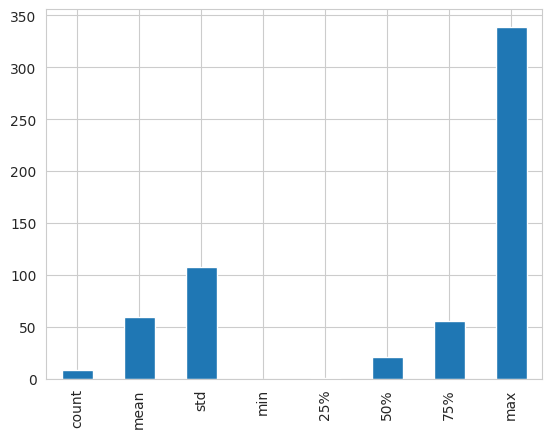

In [180]:
# Wykres słupkowy
statistics['wine_servings'].plot(kind='bar')

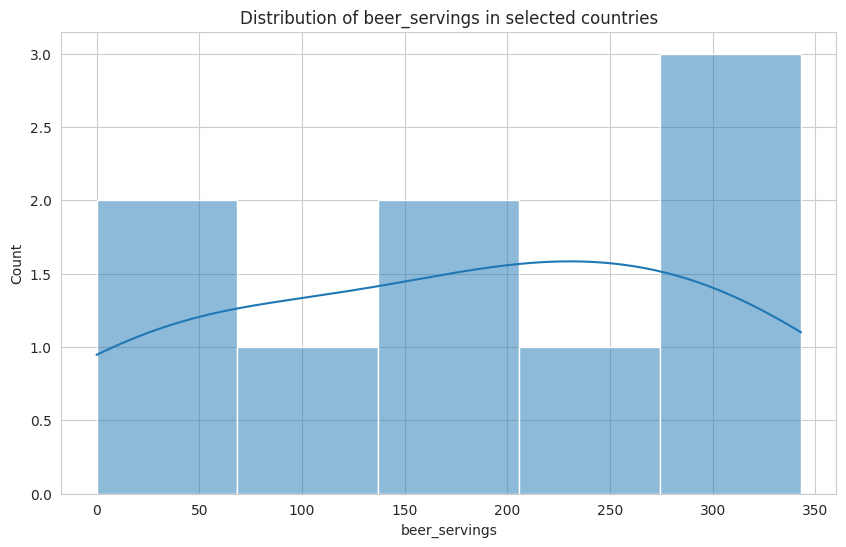

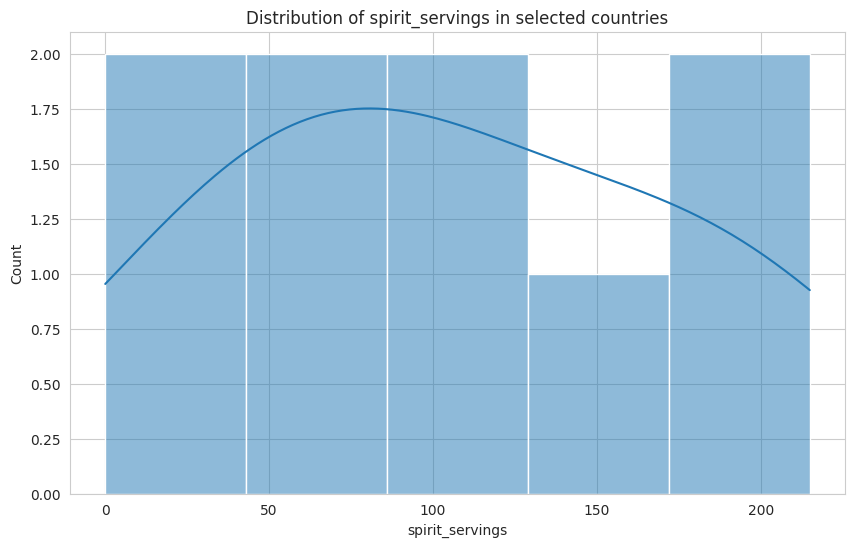

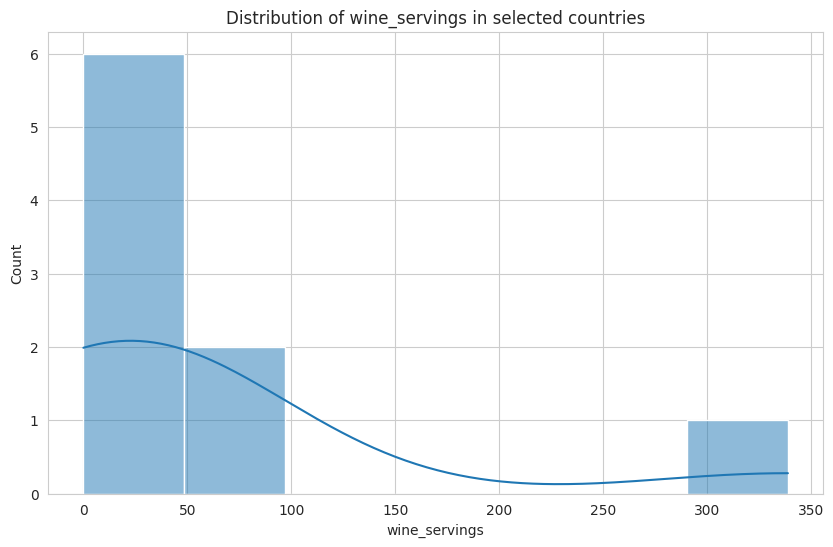

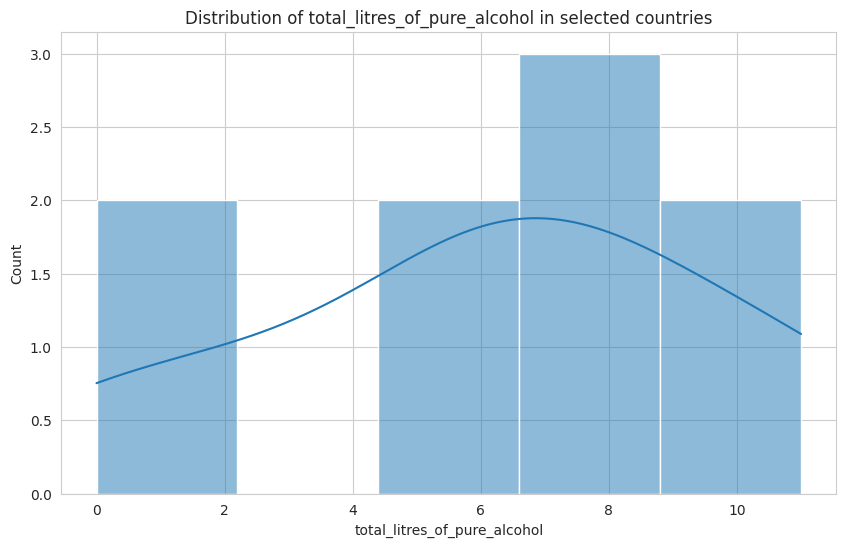

In [181]:
# Wygenerowanie wykresów
for column in selected_countries.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=selected_countries, x=column, kde=True)
    plt.title(f'Distribution of {column} in selected countries')
    plt.show()

In [182]:
world['COUNTRY'] = world['COUNTRY'].astype(str)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",Afghanistan,0.0,0.0,0.0,0.0
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",Albania,89.0,132.0,54.0,4.9
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",Algeria,25.0,0.0,14.0,0.7
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NaN,NaN,NaN,NaN,NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",Andorra,245.0,138.0,312.0,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",Vietnam,111.0,2.0,1.0,2.0
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",NaN,NaN,NaN,NaN,NaN
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",Yemen,6.0,0.0,0.0,0.1
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",Zambia,32.0,19.0,4.0,2.5


In [185]:
# Zaczytaj dane miast z temperaturami 
cities = pd.read_csv('city_temperature.csv')
cities

/tmp/ipykernel_97275/3322873053.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  cities = pd.read_csv('city_temperature.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [186]:
# Wybierz losową literę alfabetu, która będzie stanowić początek nazwy kraju
import random

random_letter = random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
random_letter

'N'

In [187]:
# Wylosuj true albo false, które będzie decydowało o tym, czy chcemy pokazywać najzimniejsze czy najcieplejsze miasta
random_bool = random.choice([True, False])
random_bool

False

In [188]:
# Ponownie stwórz selected_countries, ale tym razem wybierz kraje, które zaczynają się na wylosowaną literę
selected_countries = cities[cities['Country'].str.startswith(random_letter)]
selected_countries

,Region,Country,State,City,Month,Day,Year,AvgTemperature
155892,Africa,Namibia,NaN,Windhoek,1,1,1995,74.7
155893,Africa,Namibia,NaN,Windhoek,1,2,1995,80.8
155894,Africa,Namibia,NaN,Windhoek,1,3,1995,78.1
155895,Africa,Namibia,NaN,Windhoek,1,4,1995,80.2
155896,Africa,Namibia,NaN,Windhoek,1,5,1995,-99.0
...,...,...,...,...,...,...,...,...
1406293,South/Central America & Carribean,Nicaragua,NaN,Managua,4,18,2020,86.1
1406294,South/Central America & Carribean,Nicaragua,NaN,Managua,4,19,2020,86.5
1406295,South/Central America & Carribean,Nicaragua,NaN,Managua,4,20,2020,85.8
1406296,South/Central America & Carribean,Nicaragua,NaN,Managua,4,21,2020,84.3


In [189]:
# Zrób merge df z cities, tak by w jednym dataframe były dane o krajach i miastach
cities_df_merged = cities.merge(df, left_on='Country', right_on='country', how='left')
# Popraw Montvideo na Montevideo
cities_df_merged.loc[cities_df_merged['City'] == 'Montvideo', 'City'] = 'Montevideo'
cities_df_merged

,Region,Country,State,City,Month,Day,Year,AvgTemperature,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,Algeria,25.0,0.0,14.0,0.7
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,Algeria,25.0,0.0,14.0,0.7
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,Algeria,25.0,0.0,14.0,0.7
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,Algeria,25.0,0.0,14.0,0.7
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,Algeria,25.0,0.0,14.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4,NaN,NaN,NaN,NaN,NaN
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6,NaN,NaN,NaN,NaN,NaN
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2,NaN,NaN,NaN,NaN,NaN
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8,NaN,NaN,NaN,NaN,NaN


In [190]:
# Dla każdego kraju wybierz miasto, które ma najcieplejszą lub najzimniejszą średnią temperaturę ze względu na wylosowane wcześniej random_bool
# Każdy kraj powinien być reprezentowany przez jedno miasto
# Żeby to zrobić najpierw trzeba policzyć średnią roczną temperaturę dla każdego miasta
# Następnie dla każdego kraju wybrać miasto, które ma najcieplejszą lub najzimniejszą średnią temperaturę
# W tym celu można użyć funkcji groupby i funkcji agregujących
cities_df_merged['AvgTemperature'] = cities_df_merged.groupby(['Country', 'City'])[
    'AvgTemperature'].transform('mean')
# Pozostawienie tylko unikalnych wartości
cities_df_merged = cities_df_merged.drop_duplicates(subset=['City'])
del cities_df_merged['country']
del cities_df_merged['State']
del cities_df_merged['Month']
del cities_df_merged['Day']
del cities_df_merged['Year']
cities_df_merged

,Region,Country,City,AvgTemperature,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,Algeria,Algiers,63.755439,25.0,0.0,14.0,0.7
9266,Africa,Burundi,Bujumbura,-65.397138,88.0,0.0,0.0,6.3
13809,Africa,Benin,Cotonou,76.152126,34.0,4.0,13.0,1.1
23075,Africa,Central African Republic,Bangui,67.019512,17.0,2.0,1.0,1.8
32341,Africa,Congo,Brazzaville,69.317442,76.0,1.0,9.0,1.7
...,...,...,...,...,...,...,...,...
2862480,North America,US,Madison,47.315262,NaN,NaN,NaN,NaN
2871745,North America,US,Milwaukee,47.671333,NaN,NaN,NaN,NaN
2881010,North America,US,Casper,45.688009,NaN,NaN,NaN,NaN
2890275,North America,US,Cheyenne,46.440680,NaN,NaN,NaN,NaN


In [191]:
# Teraz wyznaczamy najcieplejsze (mające wartość min lub max w zależności od wylosowanego wcześniej random_bool) miasto dla każdego kraju
cities_indexes = cities_df_merged.groupby(['Country'])['AvgTemperature'].transform(
    'idxmax' if random_bool else 'idxmin')
cities_df_merged = cities_df_merged.loc[cities_indexes]
cities_df_merged = cities_df_merged.drop_duplicates(subset=['City'])
cities_df_merged

,Region,Country,City,AvgTemperature,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,Algeria,Algiers,63.755439,25.0,0.0,14.0,0.7
9266,Africa,Burundi,Bujumbura,-65.397138,88.0,0.0,0.0,6.3
13809,Africa,Benin,Cotonou,76.152126,34.0,4.0,13.0,1.1
23075,Africa,Central African Republic,Bangui,67.019512,17.0,2.0,1.0,1.8
32341,Africa,Congo,Brazzaville,69.317442,76.0,1.0,9.0,1.7
...,...,...,...,...,...,...,...,...
1415564,South/Central America & Carribean,Peru,Lima,66.633447,163.0,160.0,21.0,6.1
1423191,South/Central America & Carribean,Suriname,Paramaribo,47.514912,128.0,178.0,7.0,5.6
1432459,South/Central America & Carribean,Uruguay,Montevideo,60.974865,115.0,35.0,220.0,6.6
1441725,South/Central America & Carribean,Venezuela,Caracas,78.326012,333.0,100.0,3.0,7.7


In [192]:
# Teraz mergujemy dane geograficzne z danymi o miastach
cities_df_merged = world.merge(cities_df_merged, left_on='COUNTRY', right_on='Country',
                               how='left')

cities_df_merged.loc[
    ~cities_df_merged['Country'].isin(selected_countries['Country']), ['beer_servings',
                                                                       'spirit_servings',
                                                                       'wine_servings',
                                                                       'total_litres_of_pure_alcohol']] = None
# Usuń wiersze które mają wartość NaN w kolumnie City
cities_df_merged

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Region,Country,City,AvgTemperature,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",Europe,Albania,Tirana,33.172923,NaN,NaN,NaN,NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",Africa,Algeria,Algiers,63.755439,NaN,NaN,NaN,NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",Asia,Vietnam,Hanoi,74.737319,NaN,NaN,NaN,NaN
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",Africa,Zambia,Lusaka,55.903462,NaN,NaN,NaN,NaN


In [193]:
cities_with_localisation = cities_df_merged.copy()
cities_with_localisation = cities_with_localisation.dropna(subset=['City'])
cities_with_localisation

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Region,Country,City,AvgTemperature,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",Europe,Albania,Tirana,33.172923,NaN,NaN,NaN,NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",Africa,Algeria,Algiers,63.755439,NaN,NaN,NaN,NaN
9,10,Argentina,AR,Argentina,AR,138.751348,278.308965,"MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...",South/Central America & Carribean,Argentina,Buenos Aires,62.304900,NaN,NaN,NaN,NaN
12,13,Australia,AU,Australia,AU,252.165238,695.539924,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",Australia/South Pacific,Australia,Canberra,55.579689,NaN,NaN,NaN,NaN
13,14,Austria,AT,Austria,AT,22.067937,10.039441,"POLYGON ((10.47124 46.87135, 10.48821 46.93599...",Europe,Austria,Vienna,51.047226,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,241,Uruguay,UY,Uruguay,UY,18.486971,17.126245,"POLYGON ((-58.38889 -33.42250, -58.41591 -33.4...",South/Central America & Carribean,Uruguay,Montevideo,60.974865,NaN,NaN,NaN,NaN
242,243,Uzbekistan,UZ,Uzbekistan,UZ,60.322069,48.369999,"POLYGON ((68.64267 39.85824, 68.63721 39.83943...",Asia,Uzbekistan,Tashkent,58.806346,NaN,NaN,NaN,NaN
245,246,Venezuela,VE,"Venezuela, Bolivarian Republic of",VE,76.947448,74.628377,"MULTIPOLYGON (((-66.31029 10.62602, -66.28309 ...",South/Central America & Carribean,Venezuela,Caracas,78.326012,NaN,NaN,NaN,NaN
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",Asia,Vietnam,Hanoi,74.737319,NaN,NaN,NaN,NaN


In [195]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ZMWD_projekt", timeout=5)


def city_geocode(city):
    try:
        location = geolocator.geocode(city)
        print("Pobrano lokalizację dla miasta: ", city, location.latitude,
              location.longitude)
        return (location.latitude, location.longitude)
    except Exception as e:
        print("Nie udało się pobrać lokalizacji dla miasta: ", city)
        print(e)
        return (None, None)


cities_with_localisation['Latitude'], cities_with_localisation['Longitude'] = zip(
    *cities_with_localisation['City'].apply(city_geocode))
cities_with_localisation

Pobrano lokalizację dla miasta:  Tirana 41.3281482 19.8184435
Pobrano lokalizację dla miasta:  Algiers 36.7753606 3.0601882
Pobrano lokalizację dla miasta:  Buenos Aires -34.6037157 -58.381642
Pobrano lokalizację dla miasta:  Canberra -35.2975906 149.1012676
Pobrano lokalizację dla miasta:  Vienna 48.2083537 16.3725042
Pobrano lokalizację dla miasta:  Nassau 25.0782266 -77.3383438
Pobrano lokalizację dla miasta:  Manama 26.2235041 50.5822436
Pobrano lokalizację dla miasta:  Dhaka 23.7644025 90.389015
Pobrano lokalizację dla miasta:  Bridgetown 13.0977832 -59.6184184
Pobrano lokalizację dla miasta:  Minsk 53.9024716 27.5618225
Pobrano lokalizację dla miasta:  Brussels 50.8465573 4.351697
Pobrano lokalizację dla miasta:  Belize City 17.5002768 -88.1988737
Pobrano lokalizację dla miasta:  Cotonou 6.3676953 2.4252507
Pobrano lokalizację dla miasta:  Hamilton 43.2560802 -79.8728583
Pobrano lokalizację dla miasta:  La Paz -16.4955455 -68.1336229
Pobrano lokalizację dla miasta:  Sao Paulo -23

FID     COUNTRY ISO                         COUNTRYAFF AFF_ISO  \
1      2     Albania  AL                            Albania      AL   
2      3     Algeria  DZ                            Algeria      DZ   
9     10   Argentina  AR                          Argentina      AR   
12    13   Australia  AU                          Australia      AU   
13    14     Austria  AT                            Austria      AT   
..   ...         ...  ..                                ...     ...   
240  241     Uruguay  UY                            Uruguay      UY   
242  243  Uzbekistan  UZ                         Uzbekistan      UZ   
245  246   Venezuela  VE  Venezuela, Bolivarian Republic of      VE   
246  247     Vietnam  VN                           Viet Nam      VN   
249  250      Zambia  ZM                             Zambia      ZM   

     SHAPE_Leng  SHAPE_Area  \
1      9.625038    3.073540   
2     70.540082  213.513461   
9    138.751348  278.308965   
12   252.165238  695.539924   
13    22.067937   10.039441   
..          ...         ...   
240   18.486971   17.126245   
242   60.322069   48.369999   
245   76.947448   74.628377   
246   66.866802   27.556082   
249   49.141439   62.814022   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [196]:
# Ponów próbę pobrania lokalizacji dla tych miast, które nie zostały znalezione
null_cities = cities_with_localisation.loc[
    cities_with_localisation['Latitude'].isnull(), 'City']
if len(null_cities) > 0:
    geocodes = null_cities.apply(city_geocode)
    cities_with_localisation.loc[
        cities_with_localisation['Latitude'].isnull(), 'Latitude'] = geocodes.apply(
        lambda x: x[0])
    cities_with_localisation.loc[
        cities_with_localisation['Latitude'].isnull(), 'Longitude'] = geocodes.apply(
        lambda x: x[1])

In [197]:
cities_with_localisation[cities_with_localisation['Latitude'].isnull()]

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Region,Country,City,AvgTemperature,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Latitude,Longitude


In [198]:
# Utwórz POINT dla każdego miasta z cities_with_localisation za pomocą geopandas, jako kolumnę geometry
# Najpierw skopiuj do nowej geodataframe tylko nazwę miasta, szerokość i długość geograficzną
# A następnie użyj funkcji geopandas.points_from_xy, żeby utworzyć POINT i dodać kolumnę geometry
cities_gpd = gpd.GeoDataFrame(
    cities_with_localisation[['City', 'Latitude', 'Longitude']],
    geometry=gpd.points_from_xy(cities_with_localisation.Longitude,
                                cities_with_localisation.Latitude))
cities_gpd

,City,Latitude,Longitude,geometry
1,Tirana,41.328148,19.818444,POINT (19.81844 41.32815)
2,Algiers,36.775361,3.060188,POINT (3.06019 36.77536)
9,Buenos Aires,-34.603716,-58.381642,POINT (-58.38164 -34.60372)
12,Canberra,-35.297591,149.101268,POINT (149.10127 -35.29759)
13,Vienna,48.208354,16.372504,POINT (16.37250 48.20835)
...,...,...,...,...
240,Montevideo,-34.905892,-56.191310,POINT (-56.19131 -34.90589)
242,Tashkent,41.312336,69.278708,POINT (69.27871 41.31234)
245,Caracas,10.506093,-66.914601,POINT (-66.91460 10.50609)
246,Hanoi,21.028333,105.854041,POINT (105.85404 21.02833)


/tmp/ipykernel_97275/1103985532.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(['Hottest cities' if random_bool else 'Coldest cities'])
/tmp/ipykernel_97275/1103985532.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(['Hottest cities' if random_bool else 'Coldest cities'])
/tmp/ipykernel_97275/1103985532.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(['Hottest cities' if random_bool else 'Coldest cities'])
/tmp/ipykernel_97275/1103985532.py:26: UserWarning: Legend does not support handles for PatchCollection insta

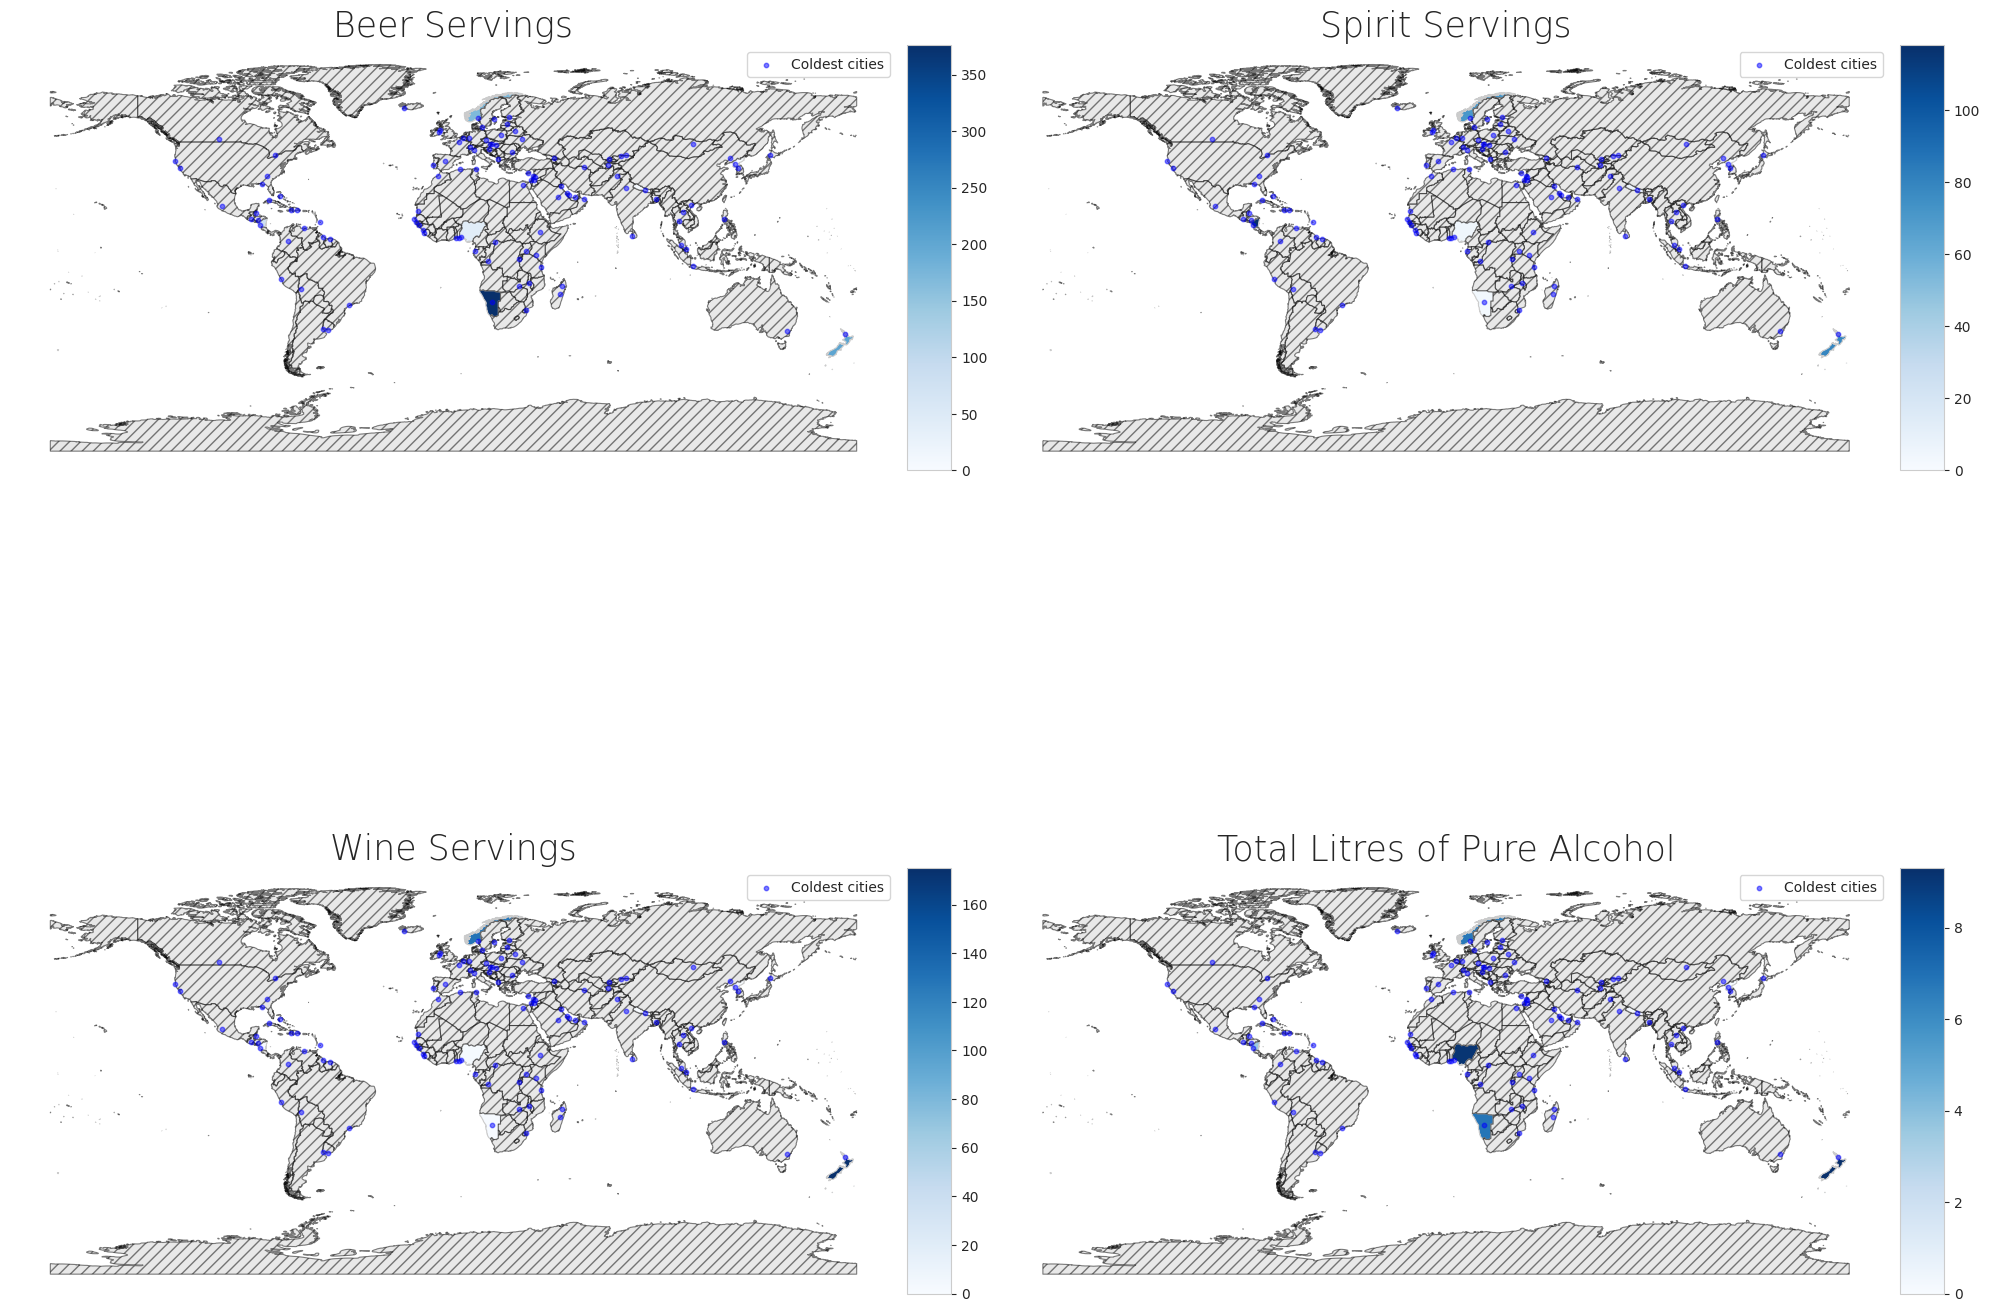

In [199]:
# Wygenerowanie wykresów
sns.set_style('whitegrid')

# Create 4 subplots - total alcohol consumption, beer, wine and spirit
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
# Tworzenie wykresów
variables = ['beer_servings', 'spirit_servings', 'wine_servings',
             'total_litres_of_pure_alcohol']
titles = ['Beer Servings', 'Spirit Servings', 'Wine Servings',
          'Total Litres of Pure Alcohol']

for var, title, ax in zip(variables, titles, axes.flatten()):
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    ax.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cities_df_merged.plot(column=var, cmap='Blues', linewidth=0.8, ax=ax,
                          edgecolor='0.8', legend=True, cax=cax, missing_kwds={
            "color": "lightgrey", "label": "Missing values", "edgecolor": "black",
            "hatch": "///", "alpha": 0.5})

    # Dodaj miasta w postaci punktów umieszczonych na wykresie, czerwone jeśli najcieplejsze, niebieskie jeśli najzimniejsze
    cities_gpd.plot(ax=ax, color='red' if random_bool else 'blue', markersize=10,
                    alpha=0.5, marker='o')
    ax.legend(['Hottest cities' if random_bool else 'Coldest cities'])

plt.tight_layout()
plt.show()

### Punkt b)

In [211]:
# Obliczenie powierzchni każdego kraju w cities_df_merged
cities_df_merged = cities_df_merged.to_crs("EPSG:6933")
cities_df_merged['area'] = cities_df_merged['geometry'].area
cities_df_merged

FID            COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Leng  \
0      1        Afghanistan  AF    Afghanistan      AF   50.803210   
1      2            Albania  AL        Albania      AL    9.625038   
2      3            Algeria  DZ        Algeria      DZ   70.540082   
3      4     American Samoa  AS  United States      US    0.600124   
4      5            Andorra  AD        Andorra      AD    0.937352   
..   ...                ...  ..            ...     ...         ...   
246  247            Vietnam  VN       Viet Nam      VN   66.866802   
247  248  Wallis and Futuna  WF         France      FR    0.700608   
248  249              Yemen  YE          Yemen      YE   34.011327   
249  250             Zambia  ZM         Zambia      ZM   49.141439   
250  251           Zimbabwe  ZW       Zimbabwe      ZW   26.298426   

     SHAPE_Area  \
0     62.566714   
1      3.073540   
2    213.513461   
3      0.013720   
4      0.055585   
..          ...   
246   27.556082   
247    0.013414   
248   38.289871   
249   62.814022   
250   33.463130   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [212]:
# Policz śmieszną statystykę - liczba stopni Celsjusza na km2, tylko że area jest w m2, więc trzeba przeliczyć
cities_df_merged['fahrenheit_per_km2'] = cities_df_merged['AvgTemperature'] / (
        cities_df_merged['area'] / 1000000)
cities_df_merged['fahrenheit_per_km2'] = np.log10(
    cities_df_merged['fahrenheit_per_km2'])
cities_df_merged

/home/kacper/PycharmProjects/ZMWD-projekt-2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


FID            COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Leng  \
0      1        Afghanistan  AF    Afghanistan      AF   50.803210   
1      2            Albania  AL        Albania      AL    9.625038   
2      3            Algeria  DZ        Algeria      DZ   70.540082   
3      4     American Samoa  AS  United States      US    0.600124   
4      5            Andorra  AD        Andorra      AD    0.937352   
..   ...                ...  ..            ...     ...         ...   
246  247            Vietnam  VN       Viet Nam      VN   66.866802   
247  248  Wallis and Futuna  WF         France      FR    0.700608   
248  249              Yemen  YE          Yemen      YE   34.011327   
249  250             Zambia  ZM         Zambia      ZM   49.141439   
250  251           Zimbabwe  ZW       Zimbabwe      ZW   26.298426   

     SHAPE_Area  \
0     62.566714   
1      3.073540   
2    213.513461   
3      0.013720   
4      0.055585   
..          ...   
246   27.556082   
247    0.013414   
248   38.289871   
249   62.814022   
250   33.463130   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [213]:
# Policz kolejną śmieszną statystykę - liczba stopni fahrenheita przypadającą na km granicy kraju
cities_df_merged['fahrenheit_per_km_border'] = cities_df_merged['AvgTemperature'] / (
        cities_df_merged['geometry'].length / 1000)
cities_df_merged['fahrenheit_per_km_border'] = np.log10(
    cities_df_merged['fahrenheit_per_km_border'])
cities_df_merged

/home/kacper/PycharmProjects/ZMWD-projekt-2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


FID            COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Leng  \
0      1        Afghanistan  AF    Afghanistan      AF   50.803210   
1      2            Albania  AL        Albania      AL    9.625038   
2      3            Algeria  DZ        Algeria      DZ   70.540082   
3      4     American Samoa  AS  United States      US    0.600124   
4      5            Andorra  AD        Andorra      AD    0.937352   
..   ...                ...  ..            ...     ...         ...   
246  247            Vietnam  VN       Viet Nam      VN   66.866802   
247  248  Wallis and Futuna  WF         France      FR    0.700608   
248  249              Yemen  YE          Yemen      YE   34.011327   
249  250             Zambia  ZM         Zambia      ZM   49.141439   
250  251           Zimbabwe  ZW       Zimbabwe      ZW   26.298426   

     SHAPE_Area  \
0     62.566714   
1      3.073540   
2    213.513461   
3      0.013720   
4      0.055585   
..          ...   
246   27.556082   
247    0.013414   
248   38.289871   
249   62.814022   
250   33.463130   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

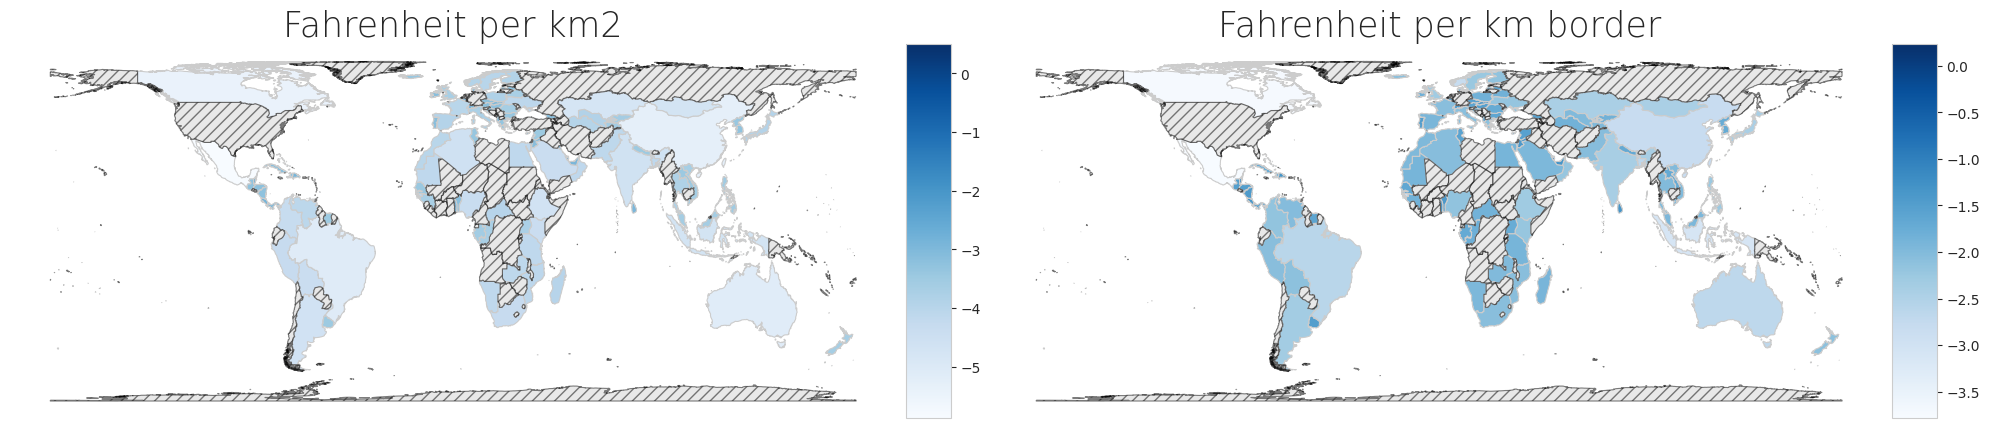

In [216]:
#Wykresy
sns.set_style('whitegrid')
#Create 2 subplots - fahrenheit per km2 and fahrenheit per km border
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
#Tworzenie wykresów
variables = ['fahrenheit_per_km2', 'fahrenheit_per_km_border']
titles = ['Fahrenheit per km2', 'Fahrenheit per km border']
for var, title, ax in zip(variables, titles, axes.flatten()):
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cities_df_merged.plot(column=var, cmap='Reds' if random_bool else 'Blues', linewidth=0.8, ax=ax,
                          edgecolor='0.8', legend=True, cax=cax, missing_kwds={
            "color": "lightgrey", "label": "Missing values", "edgecolor": "black",
            "hatch": "///", "alpha": 0.5})
plt.tight_layout()
plt.show()